# Visualizing plots
* Word cloud 
* 추이 분석
* 전체 데이터프레임 날짜 단위로 짜르기
* 아래 프로세스 거치기

In [1]:
import sys
from wordcloud import WordCloud
import pandas as pd
from konlpy.tag import Twitter 
from collections import Counter
from wordcloud import WordCloud
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import nltk

from konlpy.tag import Twitter

In [2]:
t = Twitter()

df = pd.read_csv("./result.csv")
df.title[1]

/home/nakyil/anaconda3/envs/DLassn/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


"[논담] <b>김동연</b> &quot;'공통공약' 수렴해 누가 대통령 되든 이행 약속하자&quot;"

In [3]:
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df['pubDate'] =  pd.to_datetime(df['pubDate'])

In [4]:
df.head()

,title,originallink,link,description,pubDate
0,"[여의도 사사건건] <b>김동연</b> “손실보상 많이 미흡…어설픈 지원, 재정만 ...",https://news.kbs.co.kr/news/view.do?ncd=529682...,https://news.naver.com/main/read.naver?mode=LS...,출연 : <b>김동연</b> 대선 예비 후보 https://youtu.be/jc0t...,2021-10-08 17:04:00+09:00
1,[논담] <b>김동연</b> &quot;'공통공약' 수렴해 누가 대통령 되든 이행 ...,https://hankookilbo.com/News/Read/A20211007152...,https://news.naver.com/main/read.naver?mode=LS...,실용적 경세가로서 제3지대 독자출마를 선언한 <b>김동연</b> 전 경제부총리는 대...,2021-10-07 17:01:00+09:00
2,"[정면승부] <b>김동연</b> &quot;재정 건전성보다 회복 탄력성 우선해야, ...",https://www.ytn.co.kr/_ln/0101_202110062026588197,https://news.naver.com/main/read.naver?mode=LS...,5 (17:30~19:30) ■ 방송일 : 2021년 10월 6일 (수요일) ■ 대...,2021-10-06 20:26:00+09:00
3,"`잠행` <b>김동연</b>, 창준위 발족 초읽기…`제3지대` 세력화 시동",http://www.edaily.co.kr/news/newspath.asp?news...,https://news.naver.com/main/read.naver?mode=LS...,차기 대선주자인 <b>김동연</b> 전 경제부총리가 오는 17일 무렵에 정식으로 창...,2021-10-07 14:38:00+09:00
4,"[특징주]보해양조 주가 10% 상승, <b>김동연</b> 관련주 언급",http://www.gukjenews.com/news/articleView.html...,http://www.gukjenews.com/news/articleView.html...,"보해양조 주가 10% 상승, <b>김동연</b> 관련주 언급(사진=보해양조 CI) ...",2021-10-08 15:12:00+09:00


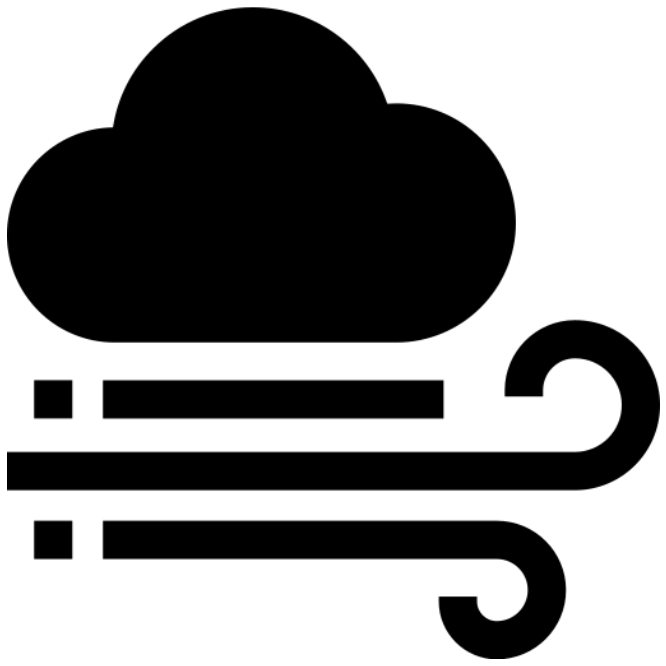

In [5]:
mask_path = "./input_data/windy.png"
mask = np.array(Image.open(mask_path))

plt.figure(figsize=(12,12))
plt.imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
df = df.sort_values('pubDate')
grps = df.groupby(pd.Grouper(key='pubDate', freq='W'))
grp_keys = list(grps.groups.keys())

# for k in grp_keys:
#     df_g = grps.get_group(k)

#     title_txt = df_g.title.to_string()
#     tokens = t.nouns(title_txt)
#     ko = nltk.Text(tokens, name="뉴스 기사")

#     data = ko.vocab().most_common(50)

#     font_path = 'NanumBarunGothic.ttf'
#     font_list_mac = fm.OSXInstalledFonts()

#     wc = WordCloud(font_path =font_path, mask=mask,
#                    background_color="white", max_words=1000,max_font_size=300).generate_from_frequencies(dict(data))



#     plt.figure(figsize=(12,12))
#     plt.imshow(wc, cmap=plt.cm.gray, interpolation="bilinear")
#     plt.axis("off")
#     plt.show()
    
#     wc.to_file('./plots/wc_{}_{}_week{}.png'.format(k.month, k.day, k.isocalendar()[1]))

gd =  grps.groups

res = []
for k in gd.keys():
    fixed_k = '{}_{}_week{}'.format(k.month, k.day, k.isocalendar()[1])
    res.append({"Date" : fixed_k, "# of articles": gd[k]})


df_date = pd.DataFrame.from_dict(res)

In [12]:
df_date

,Date,# of articles
0,7_18_week28,9
1,7_25_week29,38
2,8_1_week30,46
3,8_8_week31,109
4,8_15_week32,122
5,8_22_week33,292
6,8_29_week34,312
7,9_5_week35,339
8,9_12_week36,650
9,9_19_week37,801


In [13]:
from matplotlib import font_manager

font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'

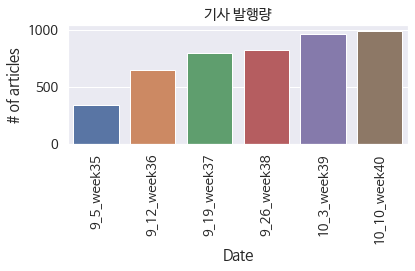

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

font_dirs = ['./NanumBarunGothic.ttf']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)


sns.set(font_scale=1.2)
# set font
plt.rcParams['font.family'] = 'NanumBarunGothic'


ax = sns.barplot(x="Date", y="# of articles", data=df_date.iloc[-6:])
plt.xticks(rotation=90)
plt.title("기사 발행량")
plt.tight_layout()
plt.savefig("./weekly_plots/article_bar.png")

In [14]:
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 

236


In [15]:
font_list

['/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf',
 '/usr/share/fonts/truetype/tlwg/Waree-BoldOblique.ttf',
 '/usr/share/fonts/truetype/padauk/PadaukBook-Regular.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/kacst-one/KacstOne-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc',
 '/usr/share/fonts/truetype/fonts-beng-extra/MuktiNarrow.ttf',
 '/usr/share/fonts/truetype/tlwg/Norasi-Oblique.ttf',
 '/usr/share/fonts/truetype/lohit-bengali/Lohit-Bengali.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationSans-Italic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation2/LiberationMono-Italic.ttf',
 '/usr/share/fo

In [16]:
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]


[]

In [17]:
print ('설정파일 위치: ', plt.matplotlib_fname())


AttributeError: module 'matplotlib.pyplot' has no attribute 'matplotlib_fname'

In [ ]:
import plotly.graph_objects as go



fig = go.Figure(data=[
    go.Bar(name='Articles', x=df_date['date'], y=df_date['articles']),
])
# Change the bar mode

fig.update_layout(
    title="Number of articles published",
    xaxis_title="Time",
    yaxis_title="# of articles",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
b)

fig.show()
 

In [118]:
fig

NameError: name 'fig' is not defined

In [134]:
c = Counter(temp_dict)
df_date = pd.DataFrame(c.items())
df_date.sort_values(0)
df_date.columns = ["date", "articles"]


In [137]:
df_date['date']

0     21-10-07
1     21-10-06
2     21-09-28
3     21-10-05
4     21-09-30
        ...   
64    21-07-19
65    21-07-18
66    21-07-17
67    21-07-16
68    21-07-15
Name: date, Length: 69, dtype: object

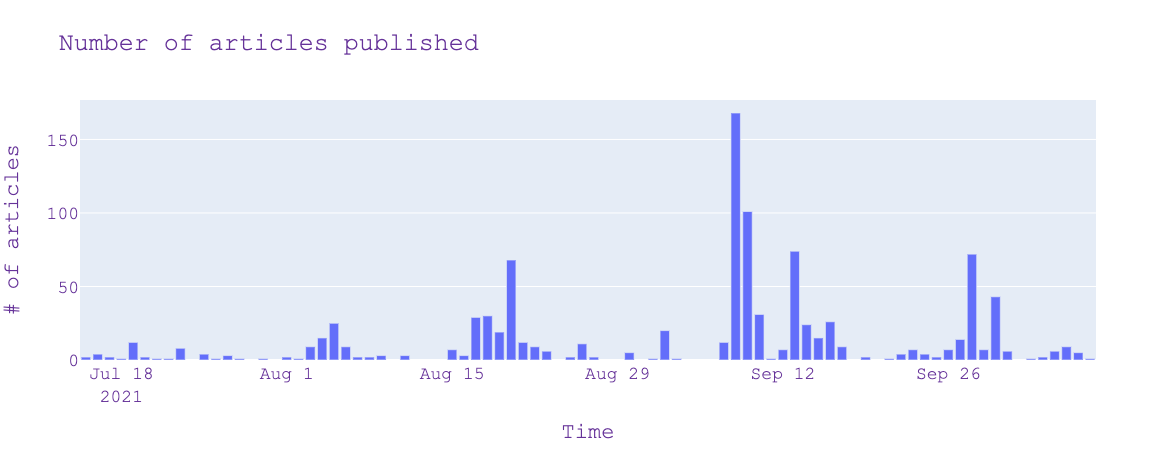

In [141]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Articles', x=df_date['date'], y=df_date['articles']),
])
# Change the bar mode

fig.update_layout(
    title="Number of articles published",
    xaxis_title="Time",
    yaxis_title="# of articles",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

fig.show()


In [102]:
import plotly.express as px

df = px.data.stocks()
fig = px.line(df, x='date', y="GOOG")
fig.show()


AttributeError: module 'plotly.express.data' has no attribute 'stocks'

In [3]:
# 감정 분석
# 모델 생성하고 뎃글 넣기

import os

def read_data(filename):
    with open(filename, 'r', encoding="cp949") as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:]
    return data

data = read_data("./dataset/ratings_morphed.txt")
data_text = [line[1] for line in data]    
data_senti = [line[2] for line in data]

In [4]:
from sklearn.model_selection import train_test_split

train_data_text, test_data_text, train_data_senti, test_data_senti \
    = train_test_split(
        data_text,
        data_senti,
        stratify=data_senti,
        test_size=0.3,
        random_state=156
)

In [5]:
from collections import Counter
train_data_senti_freq = Counter(train_data_senti)
print('train_data_senti_freq:', train_data_senti_freq)
test_data_senti_freq = Counter(test_data_senti)
print('test_data_senti_freq:', test_data_senti_freq)

train_data_senti_freq: Counter({'1': 69158, '0': 69120})
test_data_senti_freq: Counter({'1': 29639, '0': 29624})


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df=5).fit(train_data_text)
X_train = vect.transform(train_data_text)

feature_names = vect.get_feature_names()
print("특성 개수:", len(feature_names))
print("처음 20개 특성:\m", feature_names[:20])

특성 개수: 11267
처음 20개 특성:\m ['10점', '1빠', 'cgv', 'ebs', 'kbs', 'la', 'mb', 'mbc', 'naver', 'ok', 'sbs', 'sns', 'tv', 'usb', 'ㄴㄴ', 'ㄷㄷ', 'ㅂㅅ', 'ㅅㅂ', 'ㅇㅇ', 'ㅇㅇㅇ']


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=5, ngram_range=(1,2)).fit(train_data_text)
X_train = vect.transform(train_data_text)


In [8]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
y_train = pd.Series(train_data_senti)
scores = cross_val_score(LogisticRegression(solver="liblinear"), X_train, y_train, cv=5)
print('교차 검증 점수:', scores)
print('교차 검증 점수 평균:', scores.mean())

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01, 0.1, 1, 3, 5]}
grid = GridSearchCV(LogisticRegression(solver="liblinear"), param_grid, cv=5)
grid.fit(X_train, y_train)
print("최고 교차 검증 점수:", round(grid.best_score_, 3))
print("최적의 매개변수:", grid.best_params_)

교차 검증 점수: [0.82202777 0.81667631 0.81913509 0.81518713 0.81612728]
교차 검증 점수 평균: 0.8178307153197114
최고 교차 검증 점수: 0.818
최적의 매개변수: {'C': 1}


In [9]:
X_test = vect.transform(test_data_text)
y_test = pd.Series(test_data_senti)
print("테스트 데이터 점수:", grid.score(X_test, y_test))

테스트 데이터 점수: 0.8206131987918263


In [ ]:
## my data here!!